In [1]:
import pandas_datareader as pdr
import datetime 

/Users/rijumone/Kitchen/python/env_mac/lib/python3.7/site-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


### Importing Financial Data Into Python

In [2]:
aapl = pdr.get_data_yahoo(
    'AAPL', 
     start=datetime.datetime(2006, 10, 1), 
     end=datetime.datetime(2012, 1, 1),
)

In [3]:
aapl

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2006-10-02,10.838572,10.614285,10.728572,10.694285,178159800,9.258014
2006-10-03,10.707143,10.455714,10.635715,10.582857,197677200,9.161551
2006-10-04,10.780000,10.451428,10.585714,10.768572,207270700,9.322326
2006-10-05,10.880000,10.590000,10.647142,10.690000,170970800,9.254304
2006-10-06,10.720000,10.544286,10.631429,10.602858,116739700,9.178867
...,...,...,...,...,...,...
2011-12-23,57.655716,57.070000,57.098572,57.618572,67349800,49.880241
2011-12-27,58.441429,57.574287,57.585712,58.075714,66269000,50.275993
2011-12-28,58.321430,57.334286,58.127144,57.520000,57165500,49.794914


In [4]:
import quandl

In [5]:
'''
aapl = quandl.get(
    "WIKI/AAPL",
    start_date="2006-10-01",
    end_date="2012-01-01",
)
'''

'\naapl = quandl.get(\n    "WIKI/AAPL",\n    start_date="2006-10-01",\n    end_date="2012-01-01",\n)\n'

In [6]:
aapl.describe()

,High,Low,Open,Close,Volume,Adj Close
count,1323.000000,1323.000000,1323.000000,1323.000000,1.323000e+03,1323.000000
mean,29.237566,28.507684,28.901012,28.889151,1.882896e+08,25.009263
std,14.199012,14.029758,14.123131,14.119734,1.027007e+08,12.223417
min,10.568571,10.371428,10.488571,10.461429,3.937360e+07,9.056430
25%,17.752857,17.182143,17.457857,17.431429,1.122037e+08,15.090342
50%,25.642857,24.725714,25.260000,25.120001,1.629866e+08,21.746317
75%,39.132858,38.351429,38.777143,38.699999,2.316230e+08,33.502491
max,60.957142,59.427143,60.251427,60.320000,8.432424e+08,52.218872


### Working With Time Series Data

- Volume: the number of shares that got traded during a single day
- Adj Close: the closing price of the day that has been slightly adapted to include any actions that occurred at any time before the next day’s open

In [7]:
import matplotlib.pyplot as plt

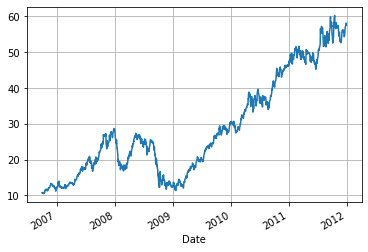

In [8]:
aapl['Open'].plot(grid=True)

In [9]:
aapl.index

DatetimeIndex(['2006-10-02', '2006-10-03', '2006-10-04', '2006-10-05',
               '2006-10-06', '2006-10-09', '2006-10-10', '2006-10-11',
               '2006-10-12', '2006-10-13',
               ...
               '2011-12-16', '2011-12-19', '2011-12-20', '2011-12-21',
               '2011-12-22', '2011-12-23', '2011-12-27', '2011-12-28',
               '2011-12-29', '2011-12-30'],
              dtype='datetime64[ns]', name='Date', length=1323, freq=None)

In [10]:
aapl.columns

Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], dtype='object')

In [11]:
ts = aapl['Close'][-10:]

In [12]:
ts

Date
2011-12-16    54.431427
2011-12-19    54.601429
2011-12-20    56.564285
2011-12-21    56.635715
2011-12-22    56.935715
2011-12-23    57.618572
2011-12-27    58.075714
2011-12-28    57.520000
2011-12-29    57.874287
2011-12-30    57.857143
Name: Close, dtype: float64

In [13]:
sample = aapl.sample(20)

Resampling is just group by

In [14]:
monthly_aapl = aapl.resample('M').mean()

In [15]:
monthly_aapl

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2006-10-31,11.123766,10.893117,11.002922,11.017987,1.634995e+08,9.538242
2006-11-30,12.314626,12.028980,12.161565,12.192109,1.647010e+08,10.554677
2006-12-31,12.546500,12.205571,12.415857,12.353071,2.111349e+08,10.694023
2007-01-31,12.880857,12.522572,12.722357,12.697357,3.401223e+08,10.992069
2007-02-28,12.382932,12.111804,12.252105,12.246842,1.805573e+08,10.602059
...,...,...,...,...,...,...
2011-08-31,54.550000,53.021304,53.894347,53.823230,1.754630e+08,46.594630
2011-09-30,56.745918,55.438096,56.054217,56.070476,1.425887e+08,48.540065
2011-10-31,57.402380,55.932245,56.677687,56.747143,1.564456e+08,49.125855


In [16]:
aapl['diff'] = aapl.Open - aapl.Close

### Common Financial Analysis

- returns
- moving windows
- volatilty calculation
- Ordinary Least-Squares Regression (OLS)

In [17]:
import numpy as np
daily_close = aapl[['Adj Close']]
daily_pct_change = daily_close.pct_change()
daily_pct_change.fillna(0, inplace=True)
# mathematical function to calculate 
# Natural logarithm of daily_close 
# where daily_close belongs to 
# all the input array elements.
daily_log_returns = np.log(daily_close.pct_change() + 1)

In [18]:
daily_log_returns

,Adj Close
Date,
2006-10-02,NaN
2006-10-03,-0.010474
2006-10-04,0.017397
2006-10-05,-0.007323
2006-10-06,-0.008185
...,...
2011-12-23,0.011922
2011-12-27,0.007903
2011-12-28,-0.009615


In [19]:
daily_pct_change

,Adj Close
Date,
2006-10-02,0.000000
2006-10-03,-0.010419
2006-10-04,0.017549
2006-10-05,-0.007297
2006-10-06,-0.008152
...,...
2011-12-23,0.011993
2011-12-27,0.007934
2011-12-28,-0.009569
